<a href="https://colab.research.google.com/github/kangel429/DeepLearning/blob/master/lesson1_pets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

%reload_ext autoreload      # 외부에서 import한 모듈을 수정사항 발생 시 매번                                Reload하면 번거롭기 때문에 자동 Reload하는 명령어

%autoreload 2                # 파이썬 코드를 실행하기 전에 항상 모든 모듈을                                     Reload하라는 의미.

%matplotlib inline          #  브라우저에서 바로 그림을 볼 수 있게 해주는 것

In [0]:
%reload_ext autoreload      
%autoreload 2               
%matplotlib inline          

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64      #얼만큼의 데이터씩 넣어 줄지를 의미합니다. batch_size = 64는 한번에 64장의 이미지 데이터가 들어감을 의미합니다.
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [0]:
help(untar_data)        # untar_data 가 무슨함수인지 검색 가능

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS); path   # 다운받아서 이 경로에 있는 파일 압축을 풀어 path변수에 집어넣는다

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()                        # 이 경로에 있는 파일 검색

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'    # 'annotations'하위 경로 추가
path_img = path/'images'          # 'images'  하위 경로 추가

In [0]:
fnames = 

(path_img)    # path_img에 5개 이미지를 가지고 와서  fnames 저장
fnames[:5]                            # fnames 프린트 해보기

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_112.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/keeshond_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Siamese_77.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_17.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_193.jpg')]

In [0]:
np.random.seed(2)                     # rand 명령은 0과 1사이 범위에 숫자를 (2) 숫자만큼 난수를 발생시킨다
pat = r'/([^/]+)_\d+.jpg$'            # r을 써줘서 문자로 인식시키기 위해 사용  / 정규식표현의 시작  [^/]의 반대로 피해야할 문자들의 집합을 정의함.	그래서 keeshond_61.jpg 이렇게 가지고 옴

In [0]:
pat

'/([^/]+)_\\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs       #path_img 이미지 위치 fnames = 파일이름 목록 , pat = 정규식 표현을 통해 걸러진 이름  ds_tfms=get_transforms(), # 좌우, 상하 뒤집기한 이미지도 학습해도 괜찮은지 # size 244*244 항상 이 크기로 설정(원본 사진은 원래 크기가 다양하기 때문에 통일 시킴)
                                  ).normalize(imagenet_stats)                # 이미지 파일 이름을 라벨로 하는 train, validation 세트를 얻습니다.    ( 여기서 라벨링이란 데이터에 정답을 달아놓는 과정입니다 )  

ImageDataBunch는 데이터 묶음 객체

ImageDataBunch한 데이터를 normalize화 해줍니다 ---> 모든 데이터를 같은 크기로 만들어야 한다 (제 각기의 다양한 데이터를 비슷한 데이터로 만들어 줌 --> 학습을 잘 시키기 위해 필요함

정규화의 목표는 값 범위의 차이를 왜곡시키지 않고 데이터 세트를 공통 스케일로 변경하는 것입니다.  (0~1)

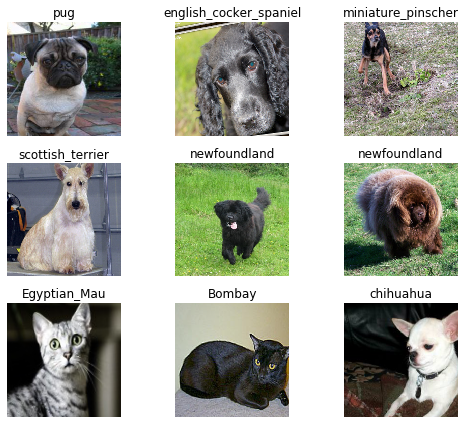

In [0]:
data.show_batch(rows=3, figsize=(7,6))    # rows=3 가로 3개   이미지 크기(7,6)으로 보여줌

In [0]:
print(data.classes)         # 생성된 데이터 객체의 클라스를 확인하는 명령어와   (라벨 이름)
len(data.classes),data.c    #  데이터셋의 개체수를 확인합니다.

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)  # resnet34 == CNN의 기본모델  생성, metrics=error_rate == 모델의 정확도를 알려줌

In [0]:
learn.model       # resnet34 모델의 대해서 

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
learn.fit_one_cycle(4)   #( )안의 숫자 4는 학습을 4번 시켜줌   0.068336 --> 대략 6% 오류율  

epoch,train_loss,valid_loss,error_rate,time
0,1.416397,0.272768,0.089986,01:44
1,0.615386,0.230731,0.080514,01:45
2,0.398437,0.230395,0.074425,01:45
3,0.281553,0.203147,0.068336,01:47


In [0]:
learn.save('stage-1')    # 학습한 것을 저장

In [0]:
interp = ClassificationInterpretation.from_learner(learn)   #learn 학습모델로 부터 분류 결과를 생성하는 부분이고, 

losses,idxs = interp.top_losses()                           #loss가 큰 것들과 해당 이미지 id를 저장합니다.

len(data.valid_ds)==len(losses)==len(idxs)                    # 원소의 개수가 동일한지 확인

True

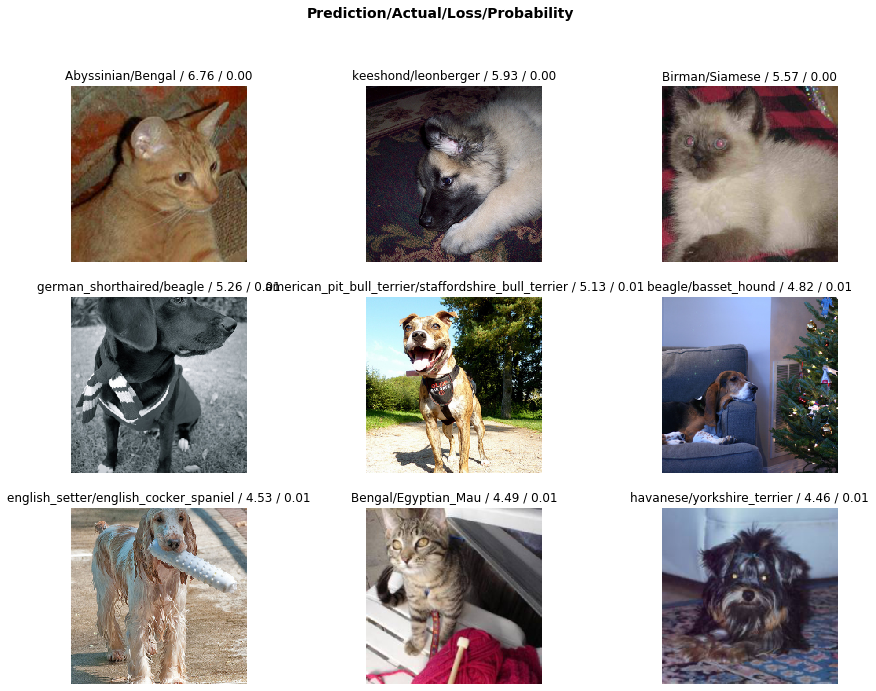

In [0]:
interp.plot_top_losses(9, figsize=(15,11))                  #9개의 loss가 큰 이미지들 보여주는 명령 ---> loss가 크다는 의미는 매우 자신있게 정답에 대한 확신을 가졌지만 그것에 대해 틀렸기 때문에 loss 수치가 높아진다

                                                            # 예측/ 결과/ loss / 확률

In [0]:
doc(interp.plot_top_losses)         #help(untar_data)보다 더욱 ()함수가 무엇인지 알려줌 

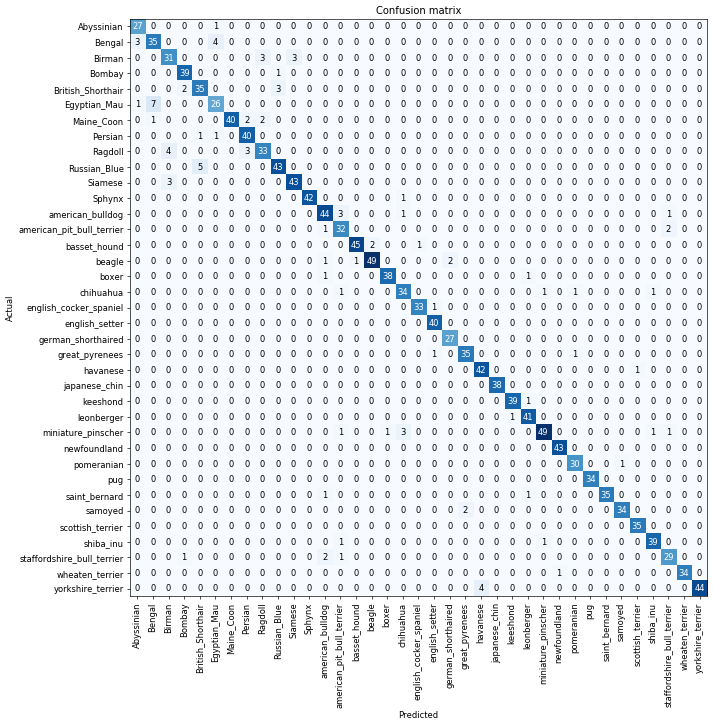

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)   #실제와 예측의 차이 나는 부분 메트릭스를 통해 보여줌  (예를들어 첫줄 26이 잘 예측함 오른쪽 1이 잘 못 예측했던 횟수)

In [0]:
interp.most_confused(min_val=2)    # 2 이상 잘못된 경우 찾아주지

[('Egyptian_Mau', 'Bengal', 7),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Ragdoll', 'Birman', 4),
 ('yorkshire_terrier', 'havanese', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Birman', 'Ragdoll', 3),
 ('Birman', 'Siamese', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Persian', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('British_Shorthair', 'Bombay', 2),
 ('Maine_Coon', 'Persian', 2),
 ('Maine_Coon', 'Ragdoll', 2),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('beagle', 'german_shorthaired', 2),
 ('samoyed', 'great_pyrenees', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2)]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.unfreeze()                  #맞게 훈련을 하고 있는 거 같으니, 고정을 해제하고 더 훈련시키기 위해서

In [0]:
learn.fit_one_cycle(1)            #한번 더 훈련

epoch,train_loss,valid_loss,error_rate,time
0,0.702504,0.353596,0.112314,01:52


In [0]:
learn.load('stage-1');            #다시 저장

In [0]:
learn.lr_find()                   # plot을 하기전에 해줘야하는 명령어 ?

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


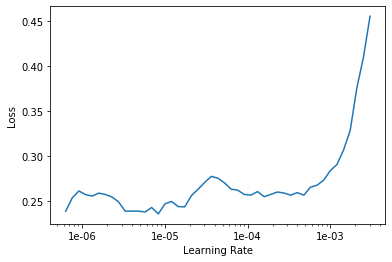

In [0]:
learn.recorder.plot()            # 표를 통해서 시각적으로 확인 가능하게 해줌

In [0]:
learn.unfreeze()                                    #맞게 훈련을 하고 있는 거 같으니, 고정을 해제하고 더 훈련시키기 위해서
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))     # max_lr=slice(1e-6,1e-4) 기존 속도보다 느리게 해서 속도조절해서 2번더 훈련하니 정확성이 좋아졌음

epoch,train_loss,valid_loss,error_rate,time
0,0.258304,0.189950,0.061570,01:51
1,0.222179,0.181700,0.059540,01:50


That's a pretty accurate model!

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),   # 이미지 파일 이름을 라벨로 하는 train, validation 세트를 얻습니다. 
                                   size=299, bs=bs//2).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)    # resnet50 ==  더 많은 레이어로 구성된 50모델 생성, 

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


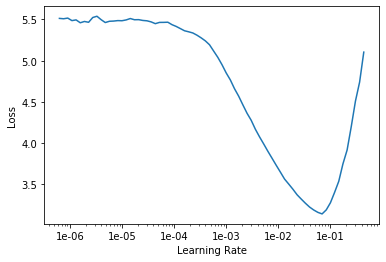

In [0]:
learn.lr_find()            # plot을 하기전에 해줘야하는 명령어 ?
learn.recorder.plot()      # 속도와 loss의 관계를 표를 통해 보여줌

In [0]:
learn.fit_one_cycle(8)                            #8번 학습

epoch,train_loss,valid_loss,error_rate,time
0,0.728860,0.271454,0.095399,03:20
1,0.482240,0.227388,0.071719,03:18
2,0.451077,0.276087,0.081867,03:20
3,0.341046,0.217765,0.062246,03:19
4,0.252498,0.184375,0.054804,03:21
5,0.206713,0.155311,0.051421,03:18
6,0.142367,0.152487,0.049391,03:19
7,0.137975,0.152482,0.051421,03:19


In [0]:
learn.save('stage-1-50')                               #학습한 모델 결과 저장

It's astonishing that it's possible to recognize pet breeds so accurately! Let's see if full fine-tuning helps:

In [0]:
learn.unfreeze()                                        #학습한 모델 결과 저장
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))          #max_lr=slice(1e-6,1e-4) 기존 속도보다 느리게 해서 속도조절해서 3번더 훈련하니 정확성이 좋아졌음

epoch,train_loss,valid_loss,error_rate,time
0,0.110155,0.167269,0.054127,04:26
1,0.098061,0.140816,0.043978,04:21
2,0.093315,0.141073,0.046685,04:21


If it doesn't, you can always go back to your previous model.

In [0]:
learn.load('stage-1-50');                             #학습한 모델 결과 불러오기

In [0]:
interp = ClassificationInterpretation.from_learner(learn)       #학습한 모델 결과 확인

In [0]:
interp.most_confused(min_val=2)                                 #2 이상 오류 확인

[('Ragdoll', 'Birman', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Egyptian_Mau', 'Bengal', 3),
 ('Ragdoll', 'Persian', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('miniature_pinscher', 'chihuahua', 3),
 ('staffordshire_bull_terrier', 'american_bulldog', 3),
 ('British_Shorthair', 'Russian_Blue', 2),
 ('Siamese', 'Birman', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'havanese', 2),
 ('yorkshire_terrier', 'wheaten_terrier', 2)]

## Other data formats

In [0]:
path = untar_data(URLs.MNIST_SAMPLE); path                      # 파일다운하고 압축해제하는 것을  path에 집어넣음

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
tfms = get_transforms(do_flip=False)                        #  사진파일이 상하 좌우가 바껴도 상관없다는 말
type(tfms)                              

tuple

In [0]:
len(tfms)                                                     # 리스트의 크기 2개

2

In [0]:
tfms                                                        #  row col

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.1), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, d

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26)    #  데이터 묶음 생성 레이블    # size 26*26

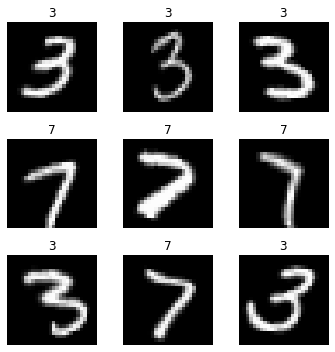

In [0]:
data.show_batch(rows=3, figsize=(5,5))                             #데이터 샘플 출력 해보기

In [0]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)       # 모델 생성
learn.fit(2)                                                       # 2번 학습

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.202875,0.089075,0.971541,00:27
1,0.122885,0.052333,0.981845,00:25


In [0]:
df = pd.read_csv(path/'labels.csv')             # CSV 파일로부터 데이터를 읽어 데이터프레임을 만듬
df.head()                                       # 만약 앞이나 뒤의 특정 갯수만 보고 싶다면 head 메서드 그래서 4개정도 보여짐

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)       # 이미지 파일 이름을 라벨로 하는 train, validation 세트를 얻습니다. 

[0, 1]

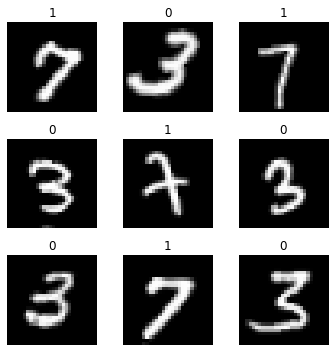

In [0]:
data.show_batch(rows=3, figsize=(5,5))                             #데이터 샘플 출력 해보기  
data.classes                                                       #[0, 1]  ---- 그래서 3 = 0 , 7 =1

In [0]:
data = ImageDataBunch.from_df(path, df, ds_tfms=tfms, size=24)       # 이미지 파일 이름을 라벨로 하는 train, validation 세트를 얻습니다. 
data.classes                                                          #[0, 1] 

[0, 1]

In [0]:
fn_paths = [path/name for name in df['name']]; fn_paths[:2]         # pd.read_csv(path/'labels.csv')이 부분에서 가져왔던 데이터프레임에서 'name'에 해당되는 것 ~2번째 까지 가지고 오기

[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 PosixPath('/root/.fastai/data/mnist_sample/train/3/21102.png')]

In [0]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path, fn_paths, pat=pat, ds_tfms=tfms, size=24)   # (이번에는 df가 아닌 pat 경로에 있는)_  이미지 파일 이름을 라벨로 하는 train, validation 세트를 얻습니다. 
data.classes                                                                         #[3, 7] 

['3', '7']

In [0]:
data = ImageDataBunch.from_name_func(path, fn_paths, ds_tfms=tfms, size=24,  #[PosixPath('/root/.fastai/data/mnist_sample/train/3/7463.png'), ----> /3/ 적혀있음
        label_func = lambda x: '3' if '/3/' in str(x) else '7')             #문자열 중에 '/3/' 에 생기면 '3' 바꿔주고 아니면 '7'로 바꿔주기
data.classes

['3', '7']

In [0]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]     # (fn_paths에 있는)  7제외 하고 가지고 오기
labels[:5]                                                         # ~ 5개 까지

['3', '3', '3', '3', '3']

In [0]:
data = ImageDataBunch.from_lists(path, fn_paths, labels=labels, ds_tfms=tfms, size=24)
data.classes

['3', '7']